In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [17]:
benin_df=pd.read_csv("../data/benin_clean.csv")
sl_df = pd.read_csv("../data/sierraleone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

# Append country column to each dataframe
benin_df['Country'] = 'Benin'
sl_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine dataframes
combined_df = pd.concat([benin_df, sl_df, togo_df])

Box Plots


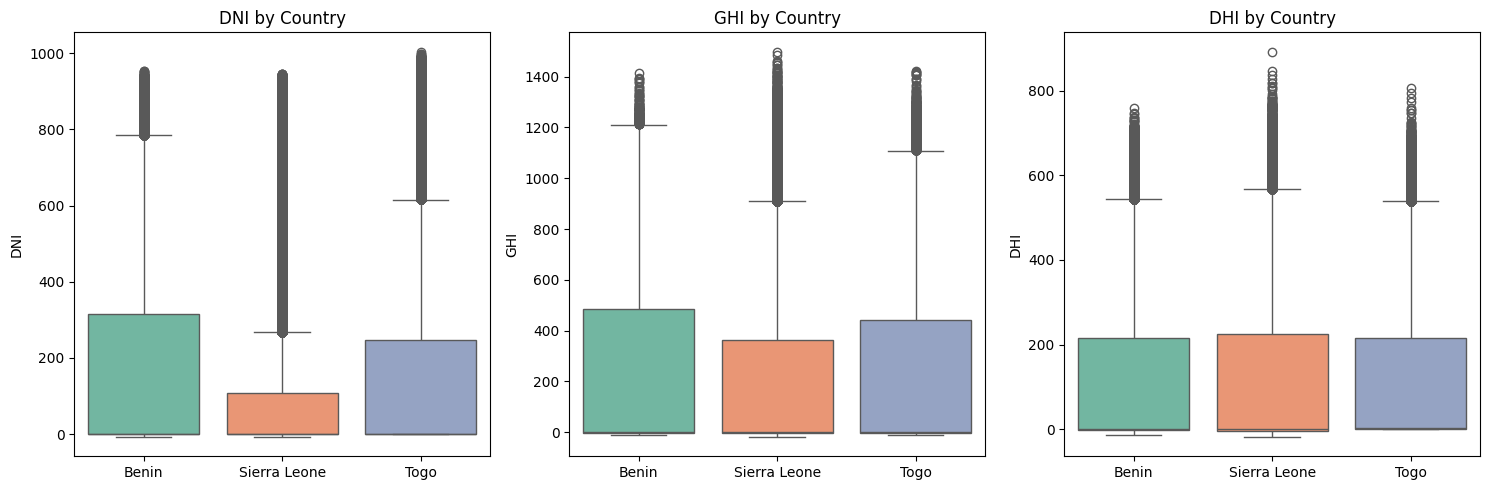

In [18]:
print("Box Plots")

columns_to_plot = ["DNI", "GHI", "DHI"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(columns_to_plot):
    sns.boxplot(
        x="Country",  
        y=var,
        hue="Country",
        data=combined_df,
        ax=axes[i],
        legend=False,
        palette="Set2",
    )
    axes[i].set_title(f"{var} by Country")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [19]:
print("Summary Tables")

combined_df.groupby("Country")[columns_to_plot].agg(['mean', 'median', 'std'])

Summary Tables


DNI                            GHI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         167.187516   -0.1  261.710501  240.559452    1.8  331.131327   
Sierra Leone  116.376337   -0.1  218.652659  201.957515    0.3  298.495150   
Togo          151.258469    0.0  250.956962  230.555040    2.1  322.532347   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [ ]:
print("ANOVA Test for GHI across Countries")

groups = [group["GHI"].dropna() for name, group in combined_df.groupby("Country")]
f_stat, p_value = f_oneway(*groups)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

ANOVA Test for GHI across Countries
One-way ANOVA Results:
F-statistic: 2090.093
P-value: 0.00000


# Summary

- TODO

In [29]:
print("Ranking Countries by Average GHI")

combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

Ranking Countries by Average GHI


Country
Benin           240.559452
Togo            230.555040
Sierra Leone    201.957515
Name: GHI, dtype: float64